In [46]:
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
#import tensorflow_hub as hub
import matplotlib.patches as patches

In [47]:
image_path = './only_cars/test/images/frame_0441.jpg'
width = 384
height = 384

In [ ]:
interpreter = tf.lite.Interpreter(model_path='lite1-detection-default.tflite')

In [ ]:
img_org = cv2.imread(image_path)
img = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (width, height))
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
img = img.astype(np.uint8)


In [ ]:
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

In [ ]:
boxes = interpreter.get_tensor(output_details[0]['index'])
labels = interpreter.get_tensor(output_details[1]['index'])
scores = interpreter.get_tensor(output_details[2]['index'])
num = interpreter.get_tensor(output_details[3]['index'])

In [ ]:
num

array([25.], dtype=float32)

In [ ]:
labels

array([[ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  6.,  2., 27.,  0.,  2.,  0.,
         2.,  2.,  2.,  0.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.]],
      dtype=float32)

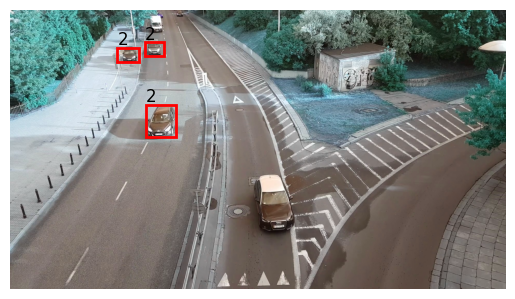

In [ ]:
fig, ax = plt.subplots()
ax.imshow(img_org)

for i in range (boxes.shape[1]):
    if scores[0, i] > 0.3:
        box = boxes[0, i, :]
        x0 = int(box[1] * img_org.shape[1])
        y0 = int(box[0] * img_org.shape[0])
        x1 = int(box[3] * img_org.shape[1])
        y1 = int(box[2] * img_org.shape[0])

        rect = patches.Rectangle((x0, y0), (x1 - x0), (y1 - y0),  fill=False, linewidth = 2, color='r')
        ax.add_patch(rect)

        ax.text(x0, (y0 - 10), str(int(labels[0, i])), fontsize=12, color='black')

ax.axis('off')
plt.show()

In [ ]:
detector

In [ ]:
def process_image(image_path, img_size=224):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_image(image, channels=3)
  image = tf.image.resize(image, (512, 512))
  image = tf.cast(image, tf.uint8)
  image = tf.expand_dims(image, axis=0)
  # Convert the colour channel values from 0-255 to 0-1 values
  #image = tf.image.convert_image_dtype(image, tf.float32)[tf.newaxis, ...]
  #image = tf.image.resize(image, size=[img_size, img_size])

  return image

In [ ]:
detector = hub.load("https://kaggle.com/models/tensorflow/efficientdet/frameworks/TensorFlow2/variations/d0/versions/1")


In [ ]:
image_tensor = process_image(image_path, width)

In [ ]:
detector_output = detector(image_tensor)
class_ids = detector_output["detection_classes"]

In [ ]:
class_ids

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 3.,  3.,  3.,  3.,  3.,  8.,  6.,  3.,  3.,  8.,  3.,  8.,  7.,
        28.,  3.,  3.,  7.,  3.,  3.,  3.,  3.,  3.,  8.,  7.,  6.,  3.,
         3.,  7.,  3.,  3.,  3., 10.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,
        10.,  7.,  3.,  6.,  3.,  3.,  3., 10., 10.,  8.,  3.,  3.,  3.,
         1.,  1.,  3.,  1.,  3.,  7.,  3.,  8.,  6.,  1., 10.,  3.,  3.,
         3.,  3.,  3.,  8.,  8., 14., 10.,  3.,  3.,  4., 10.,  1.,  3.,
        10.,  8., 10., 10.,  3.,  6.,  3.,  4., 14., 10.,  1.,  1.,  8.,
         3.,  8.,  3.,  3.,  1.,  1.,  3., 10.,  1.]], dtype=float32)>

In [ ]:
detector_output.keys()

dict_keys(['num_detections', 'detection_boxes', 'detection_classes', 'detection_multiclass_scores', 'detection_scores', 'raw_detection_scores', 'detection_anchor_indices', 'raw_detection_boxes'])

In [ ]:
detector_output['detection_scores']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.38781688, 0.35688138, 0.31232265, 0.31132457, 0.29573935,
        0.28689644, 0.28401726, 0.2757337 , 0.24599795, 0.2373959 ,
        0.22065529, 0.19225329, 0.18905169, 0.18516831, 0.18271798,
        0.18265727, 0.18134435, 0.16727181, 0.15889423, 0.15389334,
        0.14801301, 0.14350364, 0.14050686, 0.13942234, 0.13796575,
        0.13596421, 0.12599203, 0.12419892, 0.12251377, 0.12224399,
        0.11941566, 0.11770411, 0.11617149, 0.11599147, 0.11495527,
        0.11487135, 0.11114644, 0.11084027, 0.11067862, 0.11060591,
        0.10872617, 0.10815711, 0.10295059, 0.10165028, 0.09736774,
        0.09703193, 0.09639165, 0.09612458, 0.09583808, 0.09518787,
        0.09508169, 0.09496596, 0.09495556, 0.09489873, 0.09361962,
        0.09337973, 0.09299408, 0.09160271, 0.09149076, 0.09133273,
        0.08858852, 0.08490589, 0.08419404, 0.08390228, 0.0835067 ,
        0.08329236, 0.08323289, 0.08261614, 0.08115432, 0.08108071

In [ ]:
scores.shape

(1, 25)

In [ ]:
detector_output['detection_classes'].shape[0]

1

In [ ]:
def draw_boxes(file_path, classes, boxes, scores):
    image = cv2.imread(file_path)
    #image = image.resize((224,224))
    plt.figure(figsize = (8,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    h, w, _ = image.shape

    for i in range(0, classes.shape[1]):
        class_name = classes[0,i]
        if(scores[0,i] > 0.3):
            # ind = [i for i in object_classes if object_classes[i] == class_name]
            # print(ind)
            # color = colors[ind[0]]
            ymin, xmin, ymax, xmax = tuple(boxes[0,i])
            print(ymin)
            xmin = xmin * w
            xmax = xmax * w
            ymin = ymin * h
            ymax = ymax * h
            display_str = "{}: {}%".format(class_name, int(100*scores[0,i]))
            plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color = 'r', fill = False, linewidth = 2))
            plt.text(xmin, ymin, display_str, color='b', fontsize=12)
    plt.show()    

In [ ]:
detector_output['detection_boxes'].shape

TensorShape([1, 100, 4])

tf.Tensor(0.14392126, shape=(), dtype=float32)
tf.Tensor(0.11423142, shape=(), dtype=float32)
tf.Tensor(0.3369445, shape=(), dtype=float32)
tf.Tensor(0.025010355, shape=(), dtype=float32)


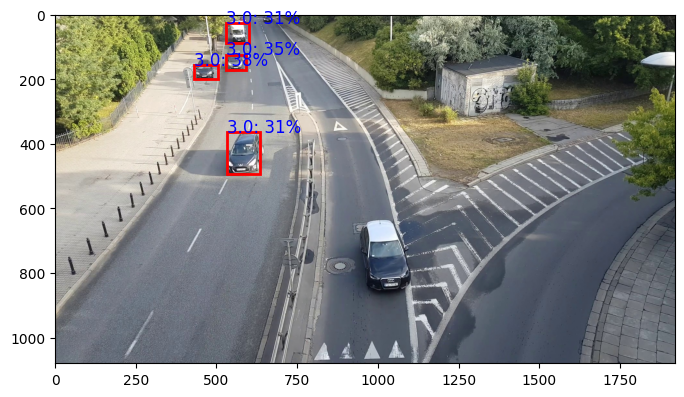

In [ ]:
draw_boxes(image_path, detector_output['detection_classes'], detector_output['detection_boxes'], detector_output['detection_scores'])

# Transfer learning

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
model = tf.keras.Sequential([
    hub.KerasLayer('https://www.kaggle.com/models/tensorflow/efficientdet/frameworks/TensorFlow2/variations/d0/versions/1', trainable = True) 
])

KeyboardInterrupt: 

In [ ]:
detector = hub.load("https://www.kaggle.com/models/tensorflow/efficientdet/frameworks/TensorFlow2/variations/d2/versions/1")


In [ ]:
hub_layer = hub.KerasLayer(detector, trainable=True)

In [48]:
import keras

## Parse YOLO annotations

In [49]:
from pathlib import Path
import os
import keras_cv

c:\Users\Tea_W\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
def parse_file(base_dir, file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

        image_name = Path(file_path).stem
        image_path = os.path.join(base_dir, 'images/', image_name + '.jpg')
        image = cv2.imread(image_path)
        height, width, _ = image.shape

        classes = []
        bboxes = []

        for line in lines:
            line = line.strip().split()
            class_id = int(line[0])
            classes.append(class_id)
            bbox = [float(x) for x in line[1:]]
            center_x, center_y, w, h = bbox

            xmin = (center_x - w / 2) * width
            xmax = (center_x + w / 2) * width
            ymin = (center_y - h / 2) * height
            ymax = (center_y + h / 2) * height

            real_box = [xmin, ymin, xmax, ymax]

            # real_box = [center_x, center_y, w, h]
            bboxes.append(real_box)
    
    return classes, image_path, bboxes


In [51]:
def parse_yolo_annotations(dir_name):
    labels_dir = os.path.join(dir_name, 'labels')
    annotation_files = os.listdir(labels_dir)

    classes = []
    bboxes = []
    image_paths = []

    for file_name in annotation_files:
        if file_name.endswith(".txt"):
            file_path = os.path.join(labels_dir, file_name)
            c, i, b = parse_file(dir_name, file_path)
            classes.append(c)
            image_paths.append(i)
            bboxes.append(b)
        
    return classes, bboxes, image_paths

### Load train data

In [52]:
train_classes, train_bboxes, train_image_paths = parse_yolo_annotations('./only_cars/train/')

In [53]:
train_classes

[[0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0,

In [54]:
train_bboxes

[[[331.00032, 407.00015999999994, 506.00064, 547.00056],
  [597.0000000000001, 208.00044000000003, 679.99968, 316.00043999999997],
  [528.99936, 103.00014, 589.99968, 167.99993999999998],
  [427.99967999999996, 117.00018, 489.0, 181.99998],
  [548.00064, 31.999859999999998, 594.0, 73.99998],
  [597.99936, 4.999320000000001, 631.00032, 37.9998],
  [840.0, 274.00032, 945.99936, 409.00032],
  [886.00032, 424.99944, 1014.99936, 616.99968],
  [159.99936, 1005.0004799999999, 382.99968, 1080.0]],
 [[329.00064000000003, 422.00028000000003, 467.00064, 557.00028],
  [888.00096, 428.00075999999996, 1019.00064, 611.00028],
  [841.9987199999999, 279.99972, 939.99936, 408.99924],
  [602.00064, 224.0001, 681.00096, 315.99989999999997],
  [533.00064, 108.99954, 589.99968, 181.99998000000002],
  [431.00064, 113.99994, 487.99968, 187.00038],
  [547.99968, 34.00001999999999, 592.00032, 77.00022],
  [600.00096, 2.9997000000000025, 635.00064, 37.99926],
  [176.99999999999997, 1059.00048, 310.00032, 1080.0]

In [55]:
tr_bbox = tf.ragged.constant(train_bboxes)
tr_classes = tf.ragged.constant(train_classes)
tr_image_paths = tf.ragged.constant(train_image_paths)

In [56]:
data = tf.data.Dataset.from_tensor_slices((tr_image_paths, tr_classes, tr_bbox))

### Split data

In [57]:
num_val = int(len(train_image_paths) * 0.2)

val_data = data.take(num_val)
train_data = data.skip(num_val)

In [58]:
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


def load_dataset(image_path, classes, bbox):
    # Read Image
    image = load_image(image_path)
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }
    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}

In [59]:
BATCH_SIZE = 4
num_boxes = 25

### Data augmentation

In [60]:
augmenter = keras.Sequential(
    layers=[
        keras_cv.layers.RandomFlip(mode="horizontal", bounding_box_format="xyxy"),
        keras_cv.layers.RandomShear(
            x_factor=0.2, y_factor=0.2, bounding_box_format="xyxy"
        ),
        keras_cv.layers.JitteredResize(
            target_size=(640, 640), scale_factor=(0.75, 1.3), bounding_box_format="xyxy"
        ),
    ]
)

In [61]:
resizing = keras_cv.layers.JitteredResize(
    target_size=(640, 640),
    scale_factor=(0.75, 1.3),
    bounding_box_format="xyxy",
)

### Create training dataset

In [62]:
train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(BATCH_SIZE * 4)
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)


### Create validation dataset

In [63]:


val_ds = val_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(BATCH_SIZE * 4)
val_ds = val_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
val_ds = val_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)

In [64]:
from keras_cv import bounding_box
from keras_cv import visualization

In [65]:
class_ids = ['car']
class_mapping = dict(zip(range(len(class_ids)), class_ids))


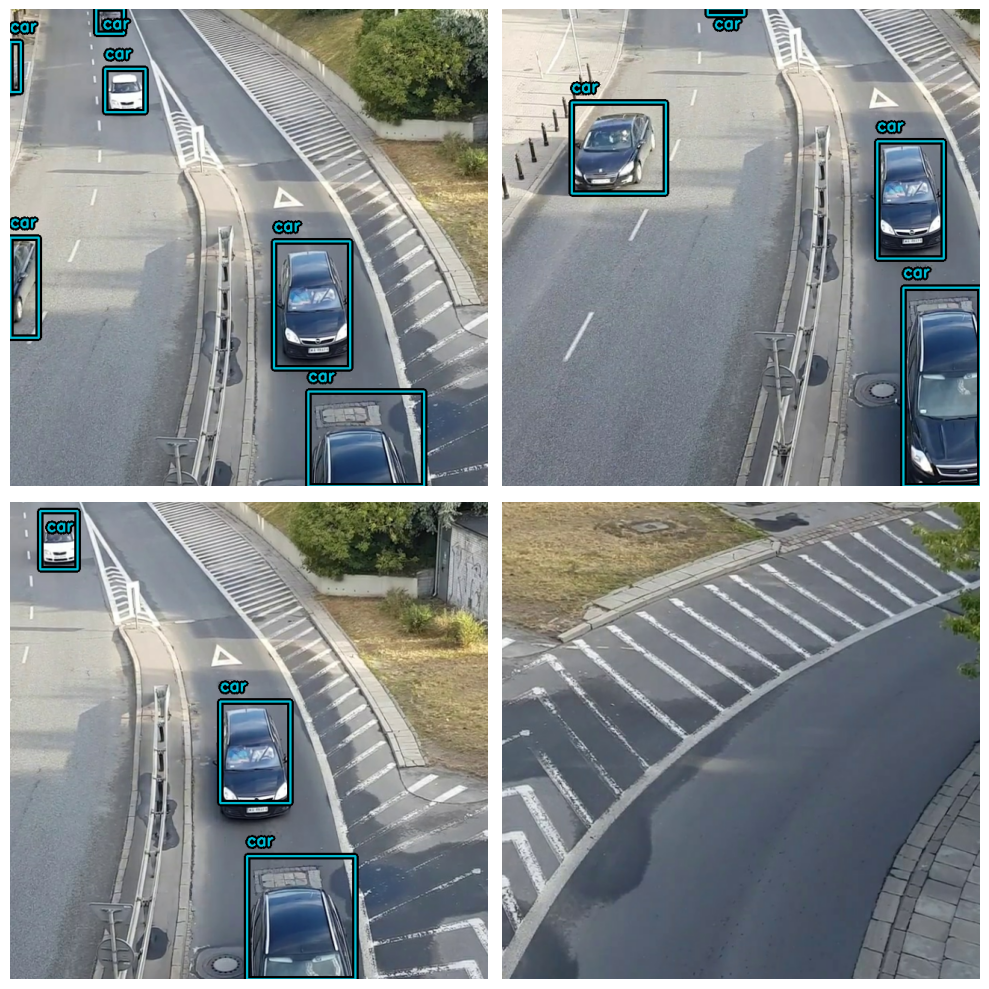

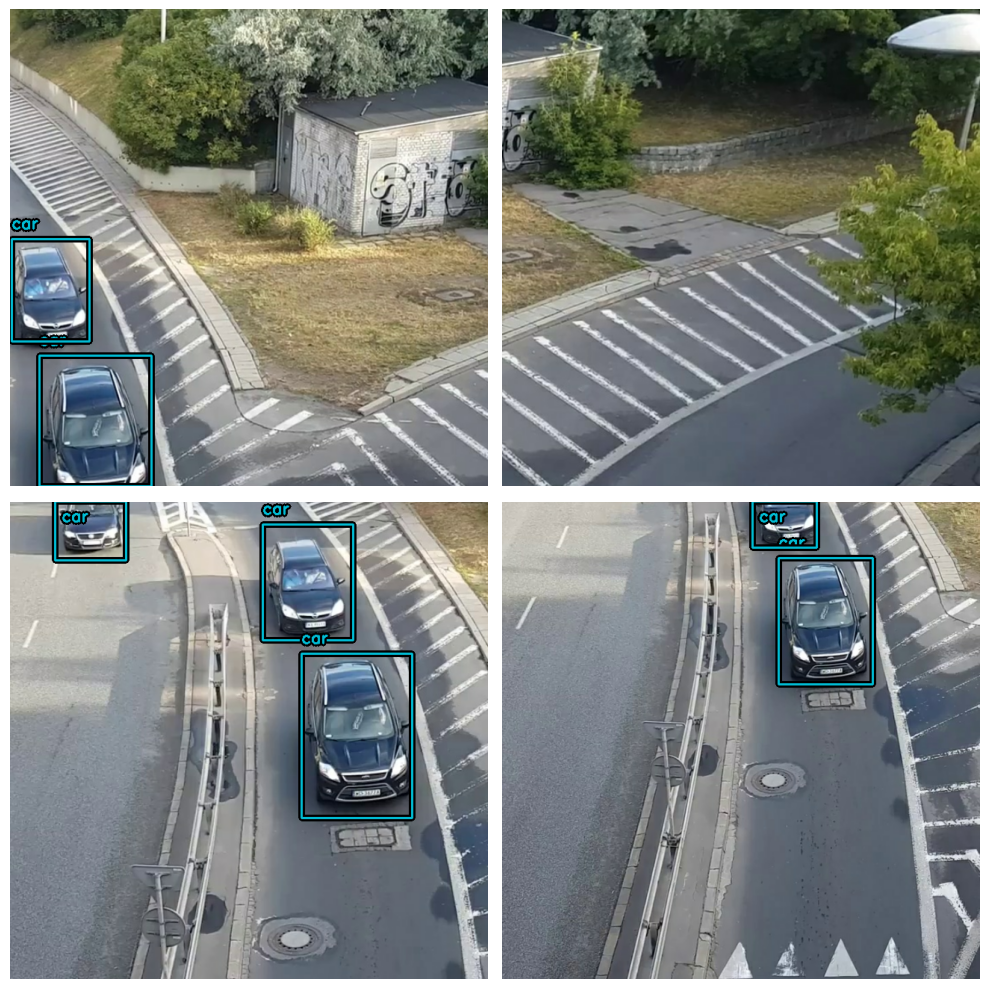

In [66]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.7,
        bounding_box_format=bounding_box_format,
        class_mapping=class_mapping,
    )


visualize_dataset(
    train_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)

visualize_dataset(
    val_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)

In [67]:
# model = keras.Sequential(hub_layer)
# model.compile()

In [68]:
image_path = './only_cars/test/images/frame_0441.jpg'
path = Path(image_path)
path.stem

'frame_0441'

In [69]:
import keras
keras.__version__

'3.0.5'

In [70]:
def dict_to_tuple(inputs):
    return inputs["images"], inputs["bounding_boxes"]


train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

val_ds = val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [71]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_s_backbone_coco"
)

In [72]:
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),
    bounding_box_format="xyxy",
    backbone=backbone,
    fpn_depth=1,
)

In [73]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    global_clipnorm=10.0,
)

yolo.compile(
    optimizer=optimizer, classification_loss="binary_crossentropy", box_loss="ciou"
)

In [74]:
class EvaluateCOCOMetricsCallback(keras.callbacks.Callback):
    def __init__(self, data, save_path):
        super().__init__()
        self.data = data
        self.metrics = keras_cv.metrics.BoxCOCOMetrics(
            bounding_box_format="xyxy",
            evaluate_freq=1e9,
        )

        self.save_path = save_path
        self.best_map = -1.0

    def on_epoch_end(self, epoch, logs):
        self.metrics.reset_state()
        for batch in self.data:
            images, y_true = batch[0], batch[1]
            y_pred = self.model.predict(images, verbose=0)
            self.metrics.update_state(y_true, y_pred)

        metrics = self.metrics.result(force=True)
        logs.update(metrics)

        current_map = metrics["MaP"]
        if current_map > self.best_map:
            self.best_map = current_map
            self.model.save(self.save_path)  # Save the model when mAP improves

        return logs

In [75]:
hist = yolo.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 414s 5s/step - loss: 222.0024 - val_loss: 3095.8005
Epoch 2/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 374s 5s/step - loss: 10.4700 - val_loss: 7.1909
Epoch 3/3
80/80 ━━━━━━━━━━━━━━━━━━━━ 378s 5s/step - loss: 5.5832 - val_loss: 5.5208


In [76]:
tf.saved_model.save(yolo, './saved_models/yolov8')

INFO:tensorflow:Assets written to: ./saved_models/yolov8\assets


INFO:tensorflow:Assets written to: ./saved_models/yolov8\assets


In [77]:
model = tf.saved_model.load('./saved_models/yolov8')

In [78]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x29d0f15fc10>

In [79]:
model = tf.saved_model.load('./saved_models/yolov8')
concrete_func = model.signatures[
    tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
concrete_func.inputs[0].set_shape([1, 256, 256, 3])
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

In [80]:
tflite = converter.convert()

In [81]:
with open('yolov8.tflite', 'wb') as f:
  f.write(tflite)

In [82]:
interpreter = tf.lite.Interpreter(model_path='yolov8.tflite')


[{'name': 'inputs', 'index': 0, 'shape': array([  1, 256, 256,   3]), 'shape_signature': array([  1, 256, 256,   3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[[[ 2.36339     0.93000007  3.0950925  ... -0.14639384  3.3852494
   -1.0468594 ]
  [ 2.1817193  -0.2142364   2.8181164  ...  0.45720443  4.590423
   -0.8139137 ]
  [ 1.4473877  -1.2100972   2.0973365  ...  0.4017156   5.608093
   -0.659709  ]
  ...
  [ 0.19312677 -0.21917996 -0.15639745 ...  0.26094043 -0.55487055
    0.2319002 ]
  [ 0.13672051 -0.3115198  -0.138501   ...  0.23200044 -0.4816569
    0.29389384]
  [-0.0514585  -0.3392573  -0.04259478 ...  0.08244774 -0.16057968
    0.3083933 ]]]
[[[0.01564687]
  [0.0240511 ]
  [0.02592463]
  ...
  [0.00363896]
  [0.02741561]
  [0.11863244]]]


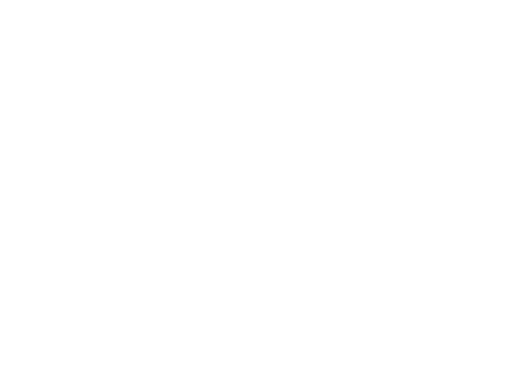

In [83]:
img_org = cv2.imread(image_path)
img = cv2.resize(img_org, (256, 256))
img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
img = img.astype(np.float32)


interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

print(input_details)

boxes = interpreter.get_tensor(output_details[0]['index'])
scores = interpreter.get_tensor(output_details[1]['index'])
print(boxes)
print(labels)
#scores = interpreter.get_tensor(output_details[2]['index'])
#num = interpreter.get_tensor(output_details[3]['index'])
	

fig, ax = plt.subplots()

for i in range (boxes.shape[1]):
    if scores[0, i] > 0.5:
        box = boxes[0, i, :]
        x0 = int(box[1] * img_org.shape[1])
        y0 = int(box[0] * img_org.shape[0])
        x1 = int(box[3] * img_org.shape[1])
        y1 = int(box[2] * img_org.shape[0])

        rect = patches.Rectangle((x0, y0), (x1 - x0), (y1 - y0))
        ax.add_patch(rect)

        ax.text(x0, (y0 - 10), str(int(labels[0, i])), fontsize=12, color='r')

ax.axis('off')
plt.show()

In [84]:
print(output_details)

[{'name': 'Identity', 'index': 437, 'shape': array([   1, 1344,   64]), 'shape_signature': array([   1, 1344,   64]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 436, 'shape': array([   1, 1344,    1]), 'shape_signature': array([   1, 1344,    1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [85]:
from PIL import Image

In [86]:
input_shape = input_details[0]['shape'][1:]  # excluding batch dimension
photo_path = image_path  # Replace with the path to your input photo
input_photo = Image.open(photo_path).resize(input_shape[:2])  # Resize input photo to match model input size
input_photo = np.array(input_photo, dtype=np.float32)  # Convert image to numpy array
input_photo /= 255.0  # Normalize pixel values to [0, 1]

In [87]:
interpreter.set_tensor(input_details[0]['index'], input_photo[np.newaxis, :])


In [88]:
interpreter.invoke()

In [89]:
output = interpreter.get_tensor(output_details[0]['index'])

In [90]:
from PIL import ImageDraw

In [91]:
output_boxes = interpreter.get_tensor(output_details[0]['index'])
output_scores = interpreter.get_tensor(output_details[1]['index'])

# Postprocess the results
# Draw bounding boxes on the input image
output_image = Image.fromarray((input_photo * 255).astype(np.uint8))
draw = ImageDraw.Draw(output_image)

for box, score in zip(output_boxes[0], output_scores[0]):
    print(box)
    ymin, xmin, ymax, xmax = box
    draw.rectangle([(xmin, ymin), (xmax, ymax)], outline="red")
    draw.text((xmin, ymin), f"Confidence: {score:.2f}", fill="red")

# Display or save the results
output_image.show()

[ 0.8905438  -0.01548744  0.19707723 -0.26360232  0.43855068  0.6233451
  0.1775182  -0.422705   -0.27089572 -0.03255952 -0.57903636 -0.62696046
 -0.99510366 -0.35055032 -0.1710306  -0.58908767  0.35186937  0.7817299
  0.09740492  0.00437969  0.3818011  -0.10761598  0.43319383 -1.0374541
  0.01768641 -0.22669105 -0.34921932 -0.07925379 -0.6209786  -0.47816497
 -0.44049937 -0.9230156   0.53479755 -0.31270587 -0.05704176  0.08850257
  0.12138209 -0.64905256 -0.49850538  0.34203407 -0.14364426 -0.01669195
 -0.64848566  0.04490189 -0.11505661 -0.13680536 -0.50574285 -0.39017123
 -0.54643995 -0.11349758 -0.2794864  -0.21827435 -0.33149245 -0.5944989
 -0.17998038  0.49573165 -0.3185652   0.04681011  0.13473797  0.35569805
 -0.00942606  0.14677149  0.3933104   0.00227391]


ValueError: too many values to unpack (expected 4)

In [100]:
def visualize_predict_detections(model, dataset, bounding_box_format):
    images, y_true = next(iter(dataset.take(1)))
        
    y_pred = model.predict(images)
    print(y_pred)
    #y_pred = keras_cv.bounding_box.to_ragged(y_pred)
    
    keras_cv.visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        true_color = (192, 57, 43),
        pred_color=(255, 235, 59),
        scale = 8,
        font_scale = 0.8,
        line_thickness=2,
        dpi = 100,
        rows=2,
        cols=2,
        show=True,
        class_mapping=class_mapping,
    )

In [94]:
test_classes, test_bboxes, test_image_paths = parse_yolo_annotations('./only_cars/test/')

In [96]:
test_image_paths = tf.ragged.constant(test_image_paths)
test_bboxes = tf.ragged.constant(test_bboxes)
test_classes = tf.ragged.constant(test_classes)

In [98]:
test_loader = tf.data.Dataset.from_tensor_slices((test_image_paths, test_classes, test_bboxes))
test_dataset = (test_loader
                .map(load_dataset, num_parallel_calls = tf.data.AUTOTUNE)
                .ragged_batch(BATCH_SIZE, drop_remainder = True)
                .map(resizing, num_parallel_calls = tf.data.AUTOTUNE)
                .map(dict_to_tuple, num_parallel_calls = tf.data.AUTOTUNE)
                .prefetch(tf.data.AUTOTUNE))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
{'boxes': array([[[ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        ...,
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ]],

       [[ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        ...,
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ],
        [ -1.      ,  -1.      ,  -1.      ,  -1.      ]],

       [[ 27.999401, 111.91147 , 132.77722 , 244.85316 ],
        [ 25.38333 , 102.55598 , 118.88524 , 226.33618 ],
        [280.01828 , -17.331924, 362.4963  ,  81.10918 ],
        ...,
        [ -1.      ,  -1.      ,  -1.    

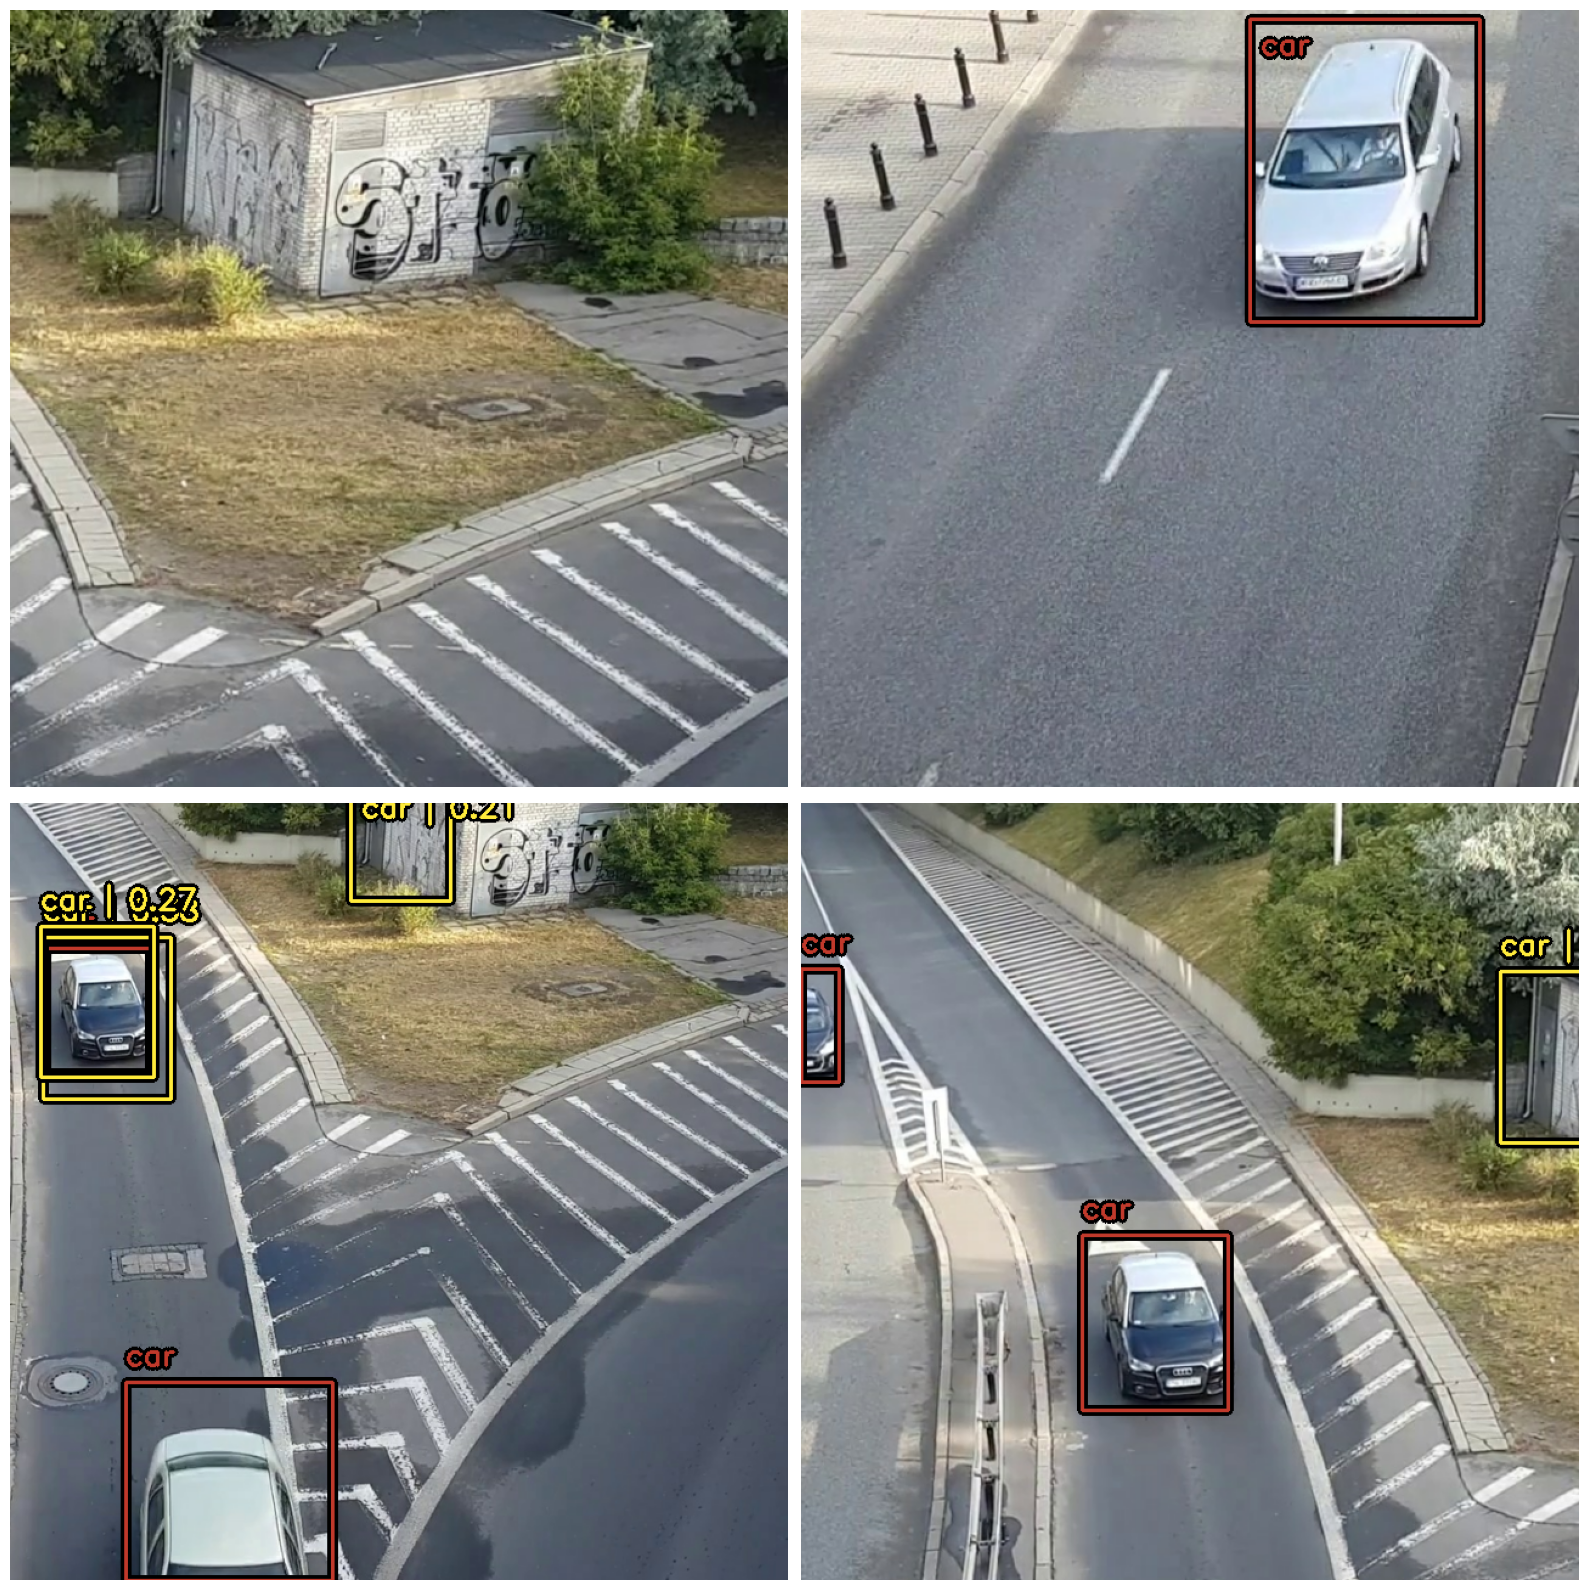

In [101]:
visualize_predict_detections(yolo, dataset = test_dataset, bounding_box_format="xyxy")

### Model evaluation

In [102]:
yolo.evaluate(test_dataset)

25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 810ms/step - loss: 6.5597


8.215885162353516

### Save weights

In [104]:
for i in range(len(yolo.weights)):
    yolo.weights[i]._handle_name = yolo.weights[i].name + "_" + str(i)

In [107]:
yolo.save_weights('yolov8.weights.h5')

In [108]:
yolo.save('yolo.keras')

In [109]:
yolo.summary()

Model: "yolov8_detector"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_1        │ [(None, None,     │  5,089,760 │ input_layer_1[0]… │
│ (Functional)        │ None, 128),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 256),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 512)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat (Repeat)     │ (None, None,      │          0 │ functional_1[0][… │
│                     │ None, 512)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_1 (Repeat)   │ (None, None,      │          0 │ repeat[0][0]      │
│                     │ None, 512)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, None,      │          0 │ repeat_1[0][0],   │
│ (Concatenate)       │ None, 768)        │            │ functional_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_co… │ (None, None,      │    196,608 │ concatenate_5[0]… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_bn  │ (None, None,      │      1,024 │ pa_fpn_p4p5_pre_… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre     │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (Activation)        │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ split_4 (Split)     │ [(None, None,     │          0 │ pa_fpn_p4p5_pre[… │
│                     │ None, 128),       │            │                   │
│                     │ (None, None,      │            │                   │
│                     │ None, 128)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │          0 │ split_4[0][1]     │
│ (ZeroPadding2D)     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │    147,456 │ pa_fpn_p4p5_pre_… │
│ (Conv2D)            │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │        512 │ pa_fpn_p4p5_pre_… │
│ (BatchNormalizatio… │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_1 │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (Activation)        │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │          0 │ pa_fpn_p4p5_pre_… │
│ (ZeroPadding2D)     │ None, 128)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pa_fpn_p4p5_pre_0_… │ (None, None,      │    147,456 │ pa_fpn_p4p5_pre_

 Total params: 38,349,291 (146.29 MB)

 Trainable params: 12,775,907 (48.74 MB)

 Non-trainable params: 21,568 (84.25 KB)

 Optimizer params: 25,551,816 (97.47 MB)

In [111]:
converter = tf.lite.TFLiteConverter.from_keras_model(yolo)
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\Tea_W\AppData\Local\Temp\tmpkmue30hf\assets


INFO:tensorflow:Assets written to: C:\Users\Tea_W\AppData\Local\Temp\tmpkmue30hf\assets


: 

: 